# EXPLORACIÓN DE DATOS

Autores:
* Rodrigo Nava
* Iker Montane
* Santiago del Castillo


Fecha: 27/08/24 - 03/08/24

Descripción: analisis inicial con bases de datos públicas, poder obtener un acercamiento de la industria para entender el posicionamiento actual de Banamex.

## CARGA DE BASE DE DATOS Y LIBRERIAS

In [92]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import statistics as st
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

#Librerias que se utilizaran para la entrega

data = "/content/drive/MyDrive/Inteligencia Artificial/reto/2. BaseDatosGeneral/acercamiento_bd.xlsx"

In [94]:
path = '/content/drive/MyDrive/Inteligencia Artificial/reto/2. BaseDatosGeneral/remesas.xlsx'
df = pd.read_excel(path)

### Diccionario de las bases de datos:

https://docs.google.com/spreadsheets/d/1fRORa6DMZuEGHz4Zh76xC5yhgSYM3YtPxN0P9MQmX3M/edit?usp=sharing


## Subir base de datos

In [95]:
Info_general_estado = pd.read_excel(data,0)
Info_general_estado.describe()

,Clave_Estado,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,ingreso_trabajo
count,33.000000,33.000000,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,32.000000
mean,19.000000,74.818182,3.925823e+06,2.933668e+06,1.516887e+06,1.416781e+06,167832.625000
std,17.073371,104.496248,3.397983e+06,2.596879e+06,1.353320e+06,1.244125e+06,42793.341732
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,99588.000000
25%,9.000000,17.000000,1.780269e+06,1.328324e+06,6.592590e+05,6.690650e+05,140784.000000
50%,17.000000,46.000000,3.138593e+06,2.356041e+06,1.215571e+06,1.163967e+06,155626.000000
75%,25.000000,84.000000,4.873559e+06,3.525861e+06,1.841376e+06,1.684485e+06,201164.000000
max,99.000000,570.000000,1.768951e+07,1.345392e+07,6.971420e+06,6.482505e+06,259180.000000


In [96]:
datos_bancarios = pd.read_excel(data,1)
datos_bancarios.describe

<bound method NDFrame.describe of                 Entidad  Número de cuentas  Tarjetas de débito  \
0        Aguascalientes          1574005.0           2763500.0   
1       Baja California          4292180.0           1621426.0   
2   Baja California Sur          1023555.0           5522799.0   
3              Campeche          1022493.0           1321844.0   
4              Coahuila          3424927.0           1212152.0   
5                Colima          1126495.0           4156999.0   
6               Chiapas          3744574.0            989783.0   
7             Chihuahua          4401144.0           5346528.0   
8      Ciudad de México         33517003.0           5207142.0   
9               Durango          1881408.0          41691670.0   
10           Guanajuato          8651047.0           2386892.0   
11             Guerrero          2993659.0           6465004.0   
12              Hidalgo          2879553.0           4069300.0   
13              Jalisco         11183194.0           3450718.0   
14               México         15140196.0           9770388.0   
15            Michoacán          5515170.0          17550787.0   
16              Morelos          2279378.0           5028051.0   
17              Nayarit          1445270.0           2203813.0   
18           Nuevo León         10787451.0           1507721.0   
19               Oaxaca          4151537.0          10461846.0   
20               Puebla          5676410.0           4380104.0   
21            Querétaro          4041580.0           6610441.0   
22         Quintana Roo          2265586.0           2767490.0   
23      San Luis Potosí          3076085.0           2708206.0   
24              Sinaloa          3663470.0           2949211.0   
25               Sonora          3458131.0           4745535.0   
26              Tabasco          2241891.0           4418735.0   
27           Tamaulipas          3954139.0           2911735.0   
28             Tlaxcala          1110260.0           4900333.0   
29             Veracruz          8117055.0           1437995.0   
30              Yucatán          2484524.0           9707308.0   
31            Zacatecas          1480425.0           2522360.0   
32      Sin identificar             5046.0           1719613.0   
33             Nacional        162608841.0         181743929.0   
34                  NaN                NaN                 NaN   

    tarjeta_credito  num_sucursales  cajero_auto  transacc_cajero_auto  \
0          356924.0           130.0        786.0             2553238.0   
1         1046212.0           355.0       2735.0             8012115.0   
2          250038.0           126.0        772.0             1784443.0   
3          173066.0            87.0        430.0             1677771.0   
4          698511.0           327.0       2131.0             6939958.0   
5          204767.0            85.0        410.0             1265247.0   
6          484724.0           257.0       1093.0             4992442.0   
7          937276.0           384.0       2374.0             7174042.0   
8         8830588.0          1619.0       8503.0            26456725.0   
9          301612.0           122.0        766.0             2682593.0   
10        1328115.0           531.0       2519.0             9389209.0   
11         497064.0           224.0        895.0             3201533.0   
12         551735.0           204.0       1051.0             4378408.0   
13        2539555.0           945.0       4404.0            14593066.0   
14        3929797.0          1306.0       6391.0            25932308.0   
15         998841.0           404.0       1622.0             5798759.0   
16         529108.0           208.0        875.0             3214030.0   
17         268252.0           112.0        647.0             2161309.0   
18        1994348.0           793.0       4863.0            12668007.0   
19         486661.0           249.0       1101.0             4511089.0   
20        1158578.0           462.0

In [97]:
Info_general_banco = pd.read_excel(data,2)
Info_general_banco.describe()

,Id_banco,num_sucursales,cajero_automatico,transacciones_cajero_autom,num_tarjeta_credito
count,50.000000,50.00000,50.000000,5.000000e+01,5.000000e+01
mean,39991.840000,294.62000,1320.980000,4.404653e+06,6.924838e+05
std,599.906672,604.35315,3140.129053,1.229718e+07,1.899437e+06
min,37019.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
25%,40060.500000,0.00000,0.000000,0.000000e+00,0.000000e+00
50%,40131.000000,13.50000,0.000000,0.000000e+00,0.000000e+00
75%,40148.750000,186.00000,725.250000,1.189502e+06,7.250875e+04
max,40164.000000,2802.00000,14500.000000,7.117115e+07,8.931375e+06


In [98]:
sucursal_banamex = pd.read_excel(data,3)
sucursal_banamex

,ID,Municipio,Descripcion estrato personal ocupado,Latitud,Longitud
0,847194,Cuauhtémoc,11 a 30 personas,19.426375,-99.169874
1,9230784,Venustiano Carranza,6 a 10 personas,19.420441,-99.094083
2,9309334,Venustiano Carranza,11 a 30 personas,19.431810,-99.090297
3,8489088,Benito Juárez,11 a 30 personas,19.373842,-99.178727
4,9296545,Álvaro Obregón,11 a 30 personas,19.389143,-99.211851
...,...,...,...,...,...
159,8625211,Cuauhtémoc,11 a 30 personas,19.410550,-99.166875
160,7768168,Gustavo A. Madero,11 a 30 personas,19.473165,-99.145123
161,7444773,Miguel Hidalgo,11 a 30 personas,19.429642,-99.212143
162,7793350,Iztapalapa,6 a 10 personas,19.368020,-99.108560


# LIMPIEZA BASE DE DATOS

### Info_general_estado

In [99]:
Info_general_estado.tail() #nos percatamos que la ultima columna no es importante

,Clave_Estado,Region,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo
28,29,Centro Sur y Oriente,Tlaxcala,60,1403177,1037926,540609,497317,0.74,130688.0
29,30,Centro Sur y Oriente,Veracruz,212,8611950,6479757,3390252,3089505,0.75,108608.0
30,31,Sur,Yucatán,106,2296184,1755849,899126,856723,0.76,151372.0
31,32,Occidente y Bajío,Zacatecas,58,1683521,1214466,626654,587812,0.72,125780.0
32,99,No aplica,Sin identificar,0,0,0,0,0,No aplica,NaN


In [100]:
Info_general_estado = Info_general_estado.drop(index=[32])

In [101]:
Info_general_estado.rename(columns={'Unnamed: 8': 'Porcentaje_pob_adulta'}, inplace= True)
Info_general_estado.columns

Index(['Clave_Estado', 'Region', 'Entidad', 'Num_Mun', 'Pob_total',
       'Pob_adulta', 'Pob_adulta_mujeres', 'Pob_adulta_hombres',
       'porcentaje_pob_adulta', 'ingreso_trabajo'],
      dtype='object')

In [102]:
Info_general_estado["porcentaje_pob_adulta"].astype('float')

,porcentaje_pob_adulta
0,0.74
1,0.76
2,0.75
3,0.74
4,0.73
5,0.75
6,0.68
7,0.75
8,0.82
9,0.73


### datos_bancarios

In [103]:
#cambiar nombre de columna para mejor manejo en el futuro
datos_bancarios.rename(columns={'Número de cuentas': 'Num_de_cuentas'}, inplace=True)
datos_bancarios.rename(columns={'Tarjetas de débito': 'tarjetas_de_débito'}, inplace=True)

In [104]:
# Quitar ultimas columnas pues son inecesarias
datos_bancarios.drop([32, 33, 34], axis=0, inplace = True)

### Info_general_banco

In [105]:
# quitar las columnas que tienen 0 en num de sucursal
Info_general_banco = Info_general_banco[Info_general_banco['num_sucursales'] != 0]
Info_general_banco= Info_general_banco[Info_general_banco['cajero_automatico'] != 0]
Info_general_banco

,Id_banco,Banco,num_sucursales,cajero_automatico,transacciones_cajero_autom,num_tarjeta_credito
0,37019,Banjercito,91,758,1437792,20601
1,37166,Banco del Bienestar,2802,2463,3231359,0
2,40002,Citibanamex,1285,9158,26702001,8380982
3,40012,BBVA,1706,14500,71171152,8931375
4,40014,Santander,1033,10194,27923456,3919279
5,40021,HSBC,862,6122,17088514,2246133
6,40030,Banco del Bajío,318,766,2518424,95464
7,40036,Inbursa,617,627,1296701,1278317
8,40042,Banca Mifel,85,99,96093,10996
9,40044,Scotiabank,435,1943,3851305,452258


In [106]:
datos_bancarios

,Entidad,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular
0,Aguascalientes,1574005.0,2763500.0,356924.0,130.0,786.0,2553238.0,823497
1,Baja California,4292180.0,1621426.0,1046212.0,355.0,2735.0,8012115.0,2549751
2,Baja California Sur,1023555.0,5522799.0,250038.0,126.0,772.0,1784443.0,581588
3,Campeche,1022493.0,1321844.0,173066.0,87.0,430.0,1677771.0,558062
4,Coahuila,3424927.0,1212152.0,698511.0,327.0,2131.0,6939958.0,2041696
5,Colima,1126495.0,4156999.0,204767.0,85.0,410.0,1265247.0,451119
6,Chiapas,3744574.0,989783.0,484724.0,257.0,1093.0,4992442.0,2108462
7,Chihuahua,4401144.0,5346528.0,937276.0,384.0,2374.0,7174042.0,2349540
8,Ciudad de México,33517003.0,5207142.0,8830588.0,1619.0,8503.0,26456725.0,20369892
9,Durango,1881408.0,41691670.0,301612.0,122.0,766.0,2682593.0,955916


# OUTLIERS BY Z-VALUE METHOD

## Poblacion total

{'whiskers': [<matplotlib.lines.Line2D at 0x7c557ed67eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c557ed64d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c557ed64ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c557ed67d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c557ed676d0>],
 'means': []}

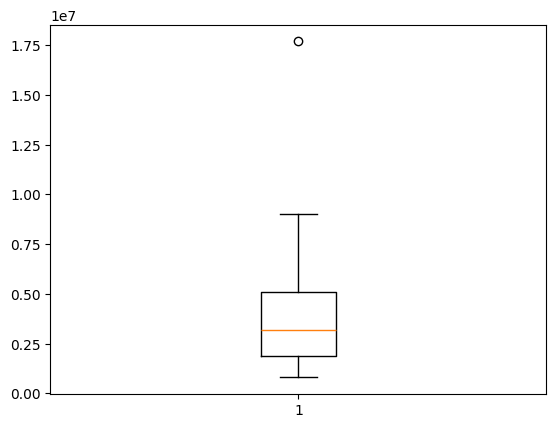

In [107]:
plt.boxplot([Info_general_estado['Pob_total']])

In [108]:
z = ((Info_general_estado['Pob_total'] - Info_general_estado['Pob_total'].mean())
/Info_general_estado['Pob_total'].std())

outliers = Info_general_estado[z > 2]
outliers

,Clave_Estado,Region,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo
14,15,Centro Sur y Oriente,México,125,17689507,13453925,6971420,6482505,0.76,155592.0


## Transacciones cajero

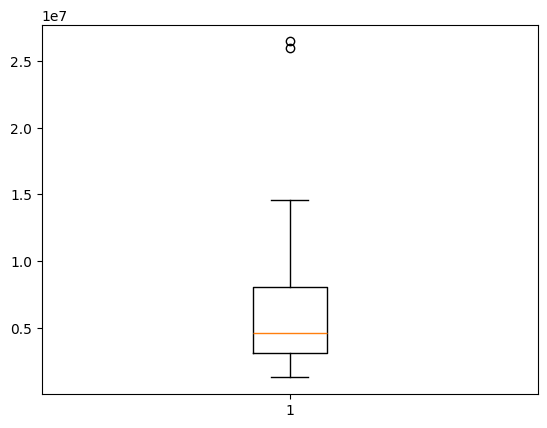

In [109]:
plt.boxplot([datos_bancarios['transacc_cajero_auto']])
plt.show()

In [110]:
z = ((datos_bancarios['transacc_cajero_auto'] - datos_bancarios['transacc_cajero_auto'].mean())
/datos_bancarios['transacc_cajero_auto'].std())

outliers = datos_bancarios[z > 2]
outliers

,Entidad,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular
8,Ciudad de México,33517003.0,5207142.0,8830588.0,1619.0,8503.0,26456725.0,20369892
14,México,15140196.0,9770388.0,3929797.0,1306.0,6391.0,25932308.0,9762242


## Número sucursales

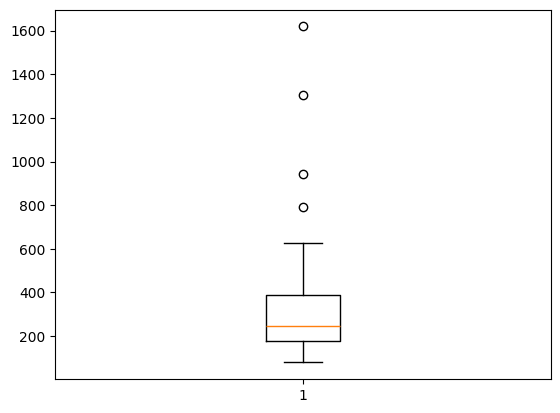

In [111]:
plt.boxplot([datos_bancarios['num_sucursales']])
plt.show()

In [112]:
z = ((datos_bancarios['num_sucursales'] - datos_bancarios['num_sucursales'].mean())
/datos_bancarios['num_sucursales'].std())

outliers = datos_bancarios[z > 2]
outliers

,Entidad,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular
8,Ciudad de México,33517003.0,5207142.0,8830588.0,1619.0,8503.0,26456725.0,20369892
14,México,15140196.0,9770388.0,3929797.0,1306.0,6391.0,25932308.0,9762242


## Número cuenta

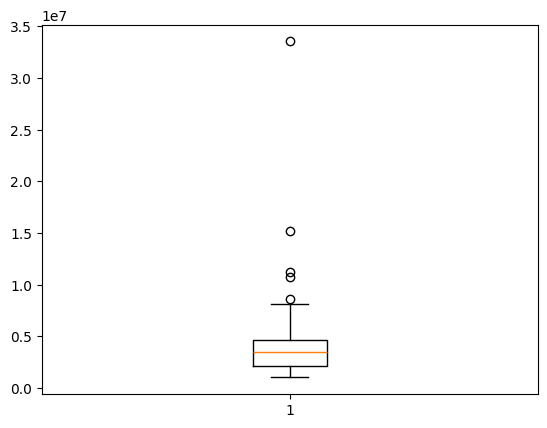

In [113]:
plt.boxplot([datos_bancarios['Num_de_cuentas']])
plt.show()

In [114]:
z = ((datos_bancarios['Num_de_cuentas'] - datos_bancarios['Num_de_cuentas'].mean())
/datos_bancarios['Num_de_cuentas'].std())

outliers = datos_bancarios[z > 2]
outliers

,Entidad,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular
8,Ciudad de México,33517003.0,5207142.0,8830588.0,1619.0,8503.0,26456725.0,20369892


## Transformación de datos Outliers

### Ciudad de México

Nos percatamos que para realizar un análisis predictivo se debian de transformar los Outliers para que no afecte el porcentaje de exactitud en el modelo. Pudimos percatarnos que nuestro valor más atípico era la Ciudad de México por lo que se creó una nueva variable sin este estado.

In [115]:
datos_bancarios_predictivo = datos_bancarios[datos_bancarios['Entidad'] != 'Ciudad de México']
datos_bancarios_predictivo

,Entidad,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular
0,Aguascalientes,1574005.0,2763500.0,356924.0,130.0,786.0,2553238.0,823497
1,Baja California,4292180.0,1621426.0,1046212.0,355.0,2735.0,8012115.0,2549751
2,Baja California Sur,1023555.0,5522799.0,250038.0,126.0,772.0,1784443.0,581588
3,Campeche,1022493.0,1321844.0,173066.0,87.0,430.0,1677771.0,558062
4,Coahuila,3424927.0,1212152.0,698511.0,327.0,2131.0,6939958.0,2041696
5,Colima,1126495.0,4156999.0,204767.0,85.0,410.0,1265247.0,451119
6,Chiapas,3744574.0,989783.0,484724.0,257.0,1093.0,4992442.0,2108462
7,Chihuahua,4401144.0,5346528.0,937276.0,384.0,2374.0,7174042.0,2349540
9,Durango,1881408.0,41691670.0,301612.0,122.0,766.0,2682593.0,955916
10,Guanajuato,8651047.0,2386892.0,1328115.0,531.0,2519.0,9389209.0,2705652


### Estado de México

En este caso quisimos cambiar los valores de Estado de México en los valores de outliers por la media.

In [116]:
#Primeramente se calculo la media en una nueva variable
media = datos_bancarios_predictivo['Num_de_cuentas'].mean()

#Utilizar la funcion replace para cambiar el dato outlier por la media
datos_bancarios_predictivo['Num_de_cuentas'] = datos_bancarios_predictivo['Num_de_cuentas'].replace(15140196.0, media)

<ipython-input-116-542f275e9e53>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# QUERIES :

## Relación entre número de sucursales y numero de cuentas por entidad(retención/adquisición)

Tipo de cuenta:

In [117]:
Info_general_estado.columns

Index(['Clave_Estado', 'Region', 'Entidad', 'Num_Mun', 'Pob_total',
       'Pob_adulta', 'Pob_adulta_mujeres', 'Pob_adulta_hombres',
       'porcentaje_pob_adulta', 'ingreso_trabajo'],
      dtype='object')

In [118]:
#join para tener los datos requeridos
joinRegionEInfoGeneralBanco= pd.merge(Info_general_estado, datos_bancarios, on='Entidad')

#agrupar por entidad y obtener total
agruparPorEntidad = joinRegionEInfoGeneralBanco.groupby('Entidad').agg({
    'Entidad':'first',
    'num_sucursales': 'sum',
    'Num_de_cuentas': 'sum',
    'tarjeta_credito': 'sum',
    'cajero_auto': 'sum',
    'transacc_cajero_auto': 'sum',
    'transacc_celular': 'sum',
    'ingreso_trabajo' : 'sum',
    'Pob_adulta' : 'sum'})


In [119]:
#insight de cuales son los 5 estados con mayor numero de sucursales
agruparPorEntidad.nlargest(5,'num_sucursales') #(Pandas.DataFrame.nlargest — Pandas 2.2.2 Documentation, 2024)

#nlargest: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

,Entidad,num_sucursales,Num_de_cuentas,tarjeta_credito,cajero_auto,transacc_cajero_auto,transacc_celular,ingreso_trabajo,Pob_adulta
Entidad,,,,,,,,,
Ciudad de México,Ciudad de México,1619.0,33517003.0,8830588.0,8503.0,26456725.0,20369892,222460.0,7408937
México,México,1306.0,15140196.0,3929797.0,6391.0,25932308.0,9762242,155592.0,13453925
Jalisco,Jalisco,945.0,11183194.0,2539555.0,4404.0,14593066.0,4889637,191536.0,6346076
Nuevo León,Nuevo León,793.0,10787451.0,1994348.0,4863.0,12668007.0,3840070,235192.0,4345372
Veracruz,Veracruz,626.0,8117055.0,1547164.0,2911.0,12401611.0,4204036,108608.0,6479757


In [120]:
#insight de cuales son los 5 estados con mayor numero de transacciones
agruparPorEntidad.nlargest(5,'transacc_cajero_auto')

,Entidad,num_sucursales,Num_de_cuentas,tarjeta_credito,cajero_auto,transacc_cajero_auto,transacc_celular,ingreso_trabajo,Pob_adulta
Entidad,,,,,,,,,
Ciudad de México,Ciudad de México,1619.0,33517003.0,8830588.0,8503.0,26456725.0,20369892,222460.0,7408937
México,México,1306.0,15140196.0,3929797.0,6391.0,25932308.0,9762242,155592.0,13453925
Jalisco,Jalisco,945.0,11183194.0,2539555.0,4404.0,14593066.0,4889637,191536.0,6346076
Nuevo León,Nuevo León,793.0,10787451.0,1994348.0,4863.0,12668007.0,3840070,235192.0,4345372
Veracruz,Veracruz,626.0,8117055.0,1547164.0,2911.0,12401611.0,4204036,108608.0,6479757


In [121]:
#insight de cuales son los 5 estados con mayor numero de ingresos
agruparPorEntidad.nlargest(5,'ingreso_trabajo')

,Entidad,num_sucursales,Num_de_cuentas,tarjeta_credito,cajero_auto,transacc_cajero_auto,transacc_celular,ingreso_trabajo,Pob_adulta
Entidad,,,,,,,,,
Baja California,Baja California,355.0,4292180.0,1046212.0,2735.0,8012115.0,2549751,259180.0,2809890
Baja California Sur,Baja California Sur,126.0,1023555.0,250038.0,772.0,1784443.0,581588,250280.0,620551
Nuevo León,Nuevo León,793.0,10787451.0,1994348.0,4863.0,12668007.0,3840070,235192.0,4345372
Ciudad de México,Ciudad de México,1619.0,33517003.0,8830588.0,8503.0,26456725.0,20369892,222460.0,7408937
Chihuahua,Chihuahua,384.0,4401144.0,937276.0,2374.0,7174042.0,2349540,214196.0,2881249


Son los mismos estados los que tienen mayor número de sucursales que de transacciones.

Plot saved as PNG at: /content/drive/MyDrive/Inteligencia Artificial/ProblemaASolucionar.png


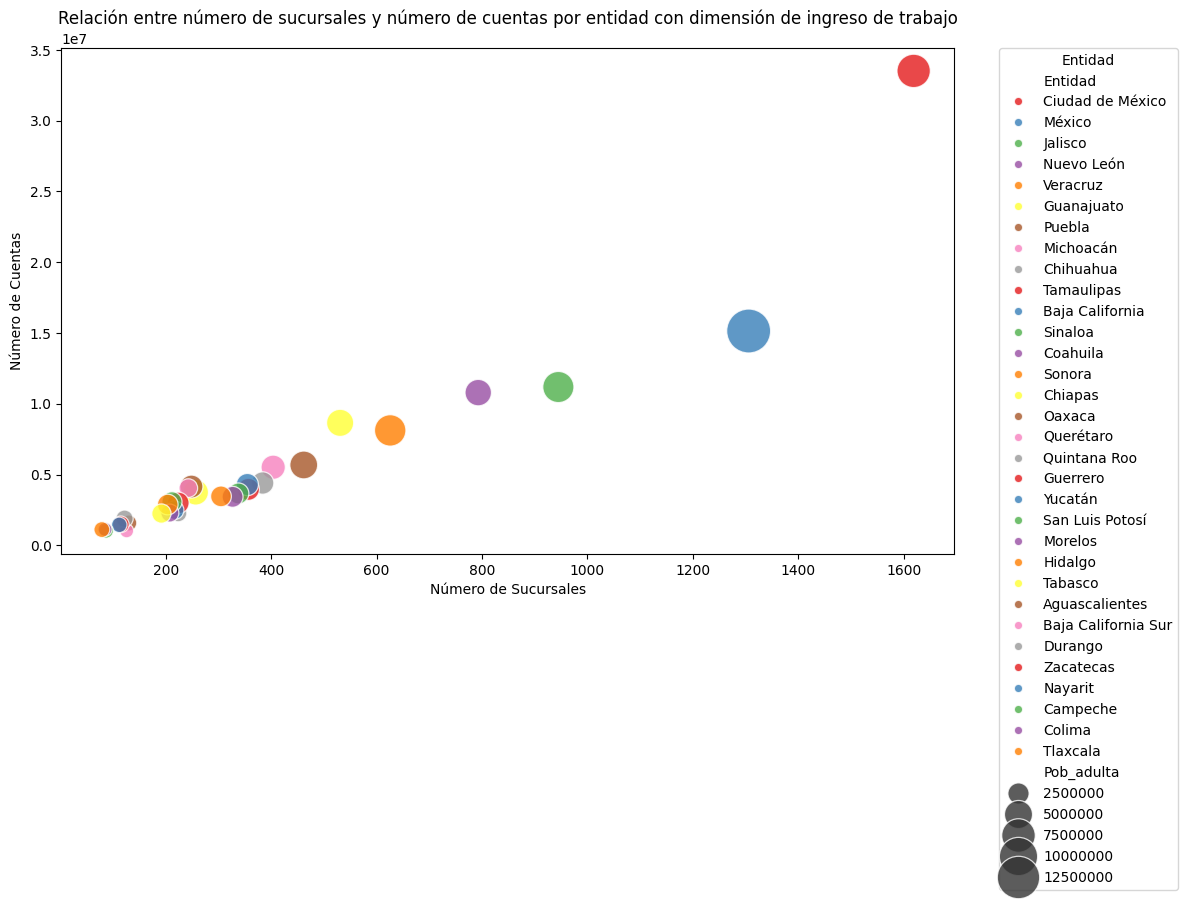

In [122]:
#agrupar conforme a los datos que queremos
agruparPorEntidad = agruparPorEntidad.sort_values(by='num_sucursales', ascending=False)

#The following plot is AI generated to obtain the wanted results
#by ChatGPT. (2024). Chatgpt.com. https://chatgpt.com/c/66eb7ea5-6cb8-800b-bc1b-30a9fedba22e

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=agruparPorEntidad,
    x='num_sucursales',
    y='Num_de_cuentas',
    hue='Entidad',
    size='Pob_adulta',
    sizes=(100, 1000),
    alpha=0.8,
    palette='Set1'
)

plt.title('Relación entre número de sucursales y número de cuentas por entidad con dimensión de ingreso de trabajo')
plt.xlabel('Número de Sucursales')
plt.ylabel('Número de Cuentas')

plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()


# Save the plot as a PNG or JPG
save_path = '/content/drive/MyDrive/Inteligencia Artificial/ProblemaASolucionar.png'  # Change folder_name as needed
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')  # Use 'jpg' if you prefer JPG format

print(f"Plot saved as PNG at: {save_path}")

plt.show()


In [123]:
save_path = '/content/drive/MyDrive/Inteligencia Artificial/graficaBuena.html'

In [124]:
! pip install mpld3

In [125]:
agruparPorEntidad

,Entidad,num_sucursales,Num_de_cuentas,tarjeta_credito,cajero_auto,transacc_cajero_auto,transacc_celular,ingreso_trabajo,Pob_adulta
Entidad,,,,,,,,,
Ciudad de México,Ciudad de México,1619.0,33517003.0,8830588.0,8503.0,26456725.0,20369892,222460.0,7408937
México,México,1306.0,15140196.0,3929797.0,6391.0,25932308.0,9762242,155592.0,13453925
Jalisco,Jalisco,945.0,11183194.0,2539555.0,4404.0,14593066.0,4889637,191536.0,6346076
Nuevo León,Nuevo León,793.0,10787451.0,1994348.0,4863.0,12668007.0,3840070,235192.0,4345372
Veracruz,Veracruz,626.0,8117055.0,1547164.0,2911.0,12401611.0,4204036,108608.0,6479757
Guanajuato,Guanajuato,531.0,8651047.0,1328115.0,2519.0,9389209.0,2705652,161256.0,4613206
Puebla,Puebla,462.0,5676410.0,1158578.0,2094.0,8099936.0,3146964,133968.0,4894197
Michoacán,Michoacán,404.0,5515170.0,998841.0,1622.0,5798759.0,2061889,142052.0,3525861
Chihuahua,Chihuahua,384.0,4401144.0,937276.0,2374.0,7174042.0,2349540,214196.0,2881249


In [126]:
agruparPorEntidad.columns

Index(['Entidad', 'num_sucursales', 'Num_de_cuentas', 'tarjeta_credito',
       'cajero_auto', 'transacc_cajero_auto', 'transacc_celular',
       'ingreso_trabajo', 'Pob_adulta'],
      dtype='object')

In [127]:
#crear una nueva columna que calcule la relación entre número de cuentas y número de sucursales a traves de una division
#los 5 estados con mayor relacion entre cuentas y sucursales de la Republica
agruparPorEntidad['relacion_real'] = agruparPorEntidad['Num_de_cuentas'] / agruparPorEntidad['num_sucursales']


top_5_estados= agruparPorEntidad.sort_values(by='relacion_real', ascending=False).head(5)


print("Los 5 estados con la mayor relación entre número de cuentas y número de sucursales:")
print()
print(top_5_estados[['num_sucursales', 'Num_de_cuentas', 'relacion_real']])


Los 5 estados con la mayor relación entre número de cuentas y número de sucursales:

                  num_sucursales  Num_de_cuentas  relacion_real
Entidad                                                        
Ciudad de México          1619.0      33517003.0   20702.287214
Oaxaca                     249.0       4151537.0   16672.839357
Querétaro                  243.0       4041580.0   16632.016461
Guanajuato                 531.0       8651047.0   16291.990584
Durango                    122.0       1881408.0   15421.377049


Un valor alto de esta relación indica que hay muchas cuentas en relación con el número de sucursales, lo que podría sugerir una alta demanda para las pocas sucursales disponibles. Es decir, hay muchas cuentas en comparación con el número de sucursales

In [128]:
#crear una nueva columna que calcule la relación entre número de cuentas y número de sucursales a traves de una division
#los 5 estados con MENOR relacion entre cuentas y sucursales de la Republica

agruparPorEntidad['relacion_real'] = agruparPorEntidad['Num_de_cuentas'] / agruparPorEntidad['num_sucursales']


top_5_estados= agruparPorEntidad.sort_values(by='relacion_real', ascending=True).head(5)

print(top_5_estados[['num_sucursales', 'Num_de_cuentas', 'relacion_real']])
print("Son las estados que tienen poco número de cuentas ")

                     num_sucursales  Num_de_cuentas  relacion_real
Entidad                                                           
Baja California Sur           126.0       1023555.0    8123.452381
Quintana Roo                  224.0       2265586.0   10114.223214
Coahuila                      327.0       3424927.0   10473.782875
Sinaloa                       338.0       3663470.0   10838.668639
Morelos                       208.0       2279378.0   10958.548077
Son las estados que tienen poco número de cuentas 


Esto podría indicar que las sucursales en esos estados están más distribuidas o que la demanda por cuenta no es tan alta en relación con la infraestructura bancaria existente.

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression

# Define variables and train the model
X = agruparPorEntidad[['num_sucursales']]
y = agruparPorEntidad['Num_de_cuentas']

modelo = LinearRegression()
modelo.fit(X, y)

# Prediction
agruparPorEntidad['Predicción_Cuentas'] = modelo.predict(X)

# Plotly Scatter Plot with Linear Regression Line
fig = go.Figure()

# Scatter plot of actual data points
fig.add_trace(go.Scatter(
    x=agruparPorEntidad['num_sucursales'],
    y=agruparPorEntidad['Num_de_cuentas'],
    mode='markers',
    name='Número de Cuentas',
    marker=dict(size=10, color='blue', opacity=0.7),
    text=agruparPorEntidad['Entidad']  # Assuming 'Entidad' is the name of the entity
))

# Linear regression line
fig.add_trace(go.Scatter(
    x=agruparPorEntidad['num_sucursales'],
    y=agruparPorEntidad['Predicción_Cuentas'],
    mode='lines',
    name='Línea de Regresión',
    line=dict(color='red', width=2)
))

# Layout improvements
fig.update_layout(
    title='Regresión Lineal: Número de Sucursales vs Número de Cuentas',
    xaxis_title='Número de Sucursales',
    yaxis_title='Número de Cuentas',
    template='plotly_white',
    legend=dict(
        title='Leyenda',
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=40, r=40, t=80, b=40)
)

# Show the interactive plot
fig.show()


In [130]:
agruparPorEntidad

,Entidad,num_sucursales,Num_de_cuentas,tarjeta_credito,cajero_auto,transacc_cajero_auto,transacc_celular,ingreso_trabajo,Pob_adulta,relacion_real,Predicción_Cuentas
Entidad,,,,,,,,,,,
Ciudad de México,Ciudad de México,1619.0,33517003.0,8830588.0,8503.0,26456725.0,20369892,222460.0,7408937,20702.287214,2.581205e+07
México,México,1306.0,15140196.0,3929797.0,6391.0,25932308.0,9762242,155592.0,13453925,11592.799387,2.061719e+07
Jalisco,Jalisco,945.0,11183194.0,2539555.0,4404.0,14593066.0,4889637,191536.0,6346076,11834.067725,1.462568e+07
Nuevo León,Nuevo León,793.0,10787451.0,1994348.0,4863.0,12668007.0,3840070,235192.0,4345372,13603.343001,1.210293e+07
Veracruz,Veracruz,626.0,8117055.0,1547164.0,2911.0,12401611.0,4204036,108608.0,6479757,12966.541534,9.331236e+06
Guanajuato,Guanajuato,531.0,8651047.0,1328115.0,2519.0,9389209.0,2705652,161256.0,4613206,16291.990584,7.754522e+06
Puebla,Puebla,462.0,5676410.0,1158578.0,2094.0,8099936.0,3146964,133968.0,4894197,12286.601732,6.609329e+06
Michoacán,Michoacán,404.0,5515170.0,998841.0,1622.0,5798759.0,2061889,142052.0,3525861,13651.410891,5.646704e+06
Chihuahua,Chihuahua,384.0,4401144.0,937276.0,2374.0,7174042.0,2349540,214196.0,2881249,11461.312500,5.314764e+06


Se tiene una clara tendencia marcada entre el número de sucursales y el número de cuentas, lo que nos llama la atención del modelo es que a medida que van aumentando las sucursales,tiende a una dispersión en los datos. De igual manera se pueden observar outliers en el model como México y definitivamente la Ciudad de México lo cual sugiere que hay otros factores que también podrían estar influyendo en el número de cuentas.

## Correlaciones

In [131]:
import plotly.express as px
import plotly.graph_objects as go

# Compute correlation matrix, excluding non-numeric columns
correlation_matrix = agruparPorEntidad.select_dtypes(include=np.number).corr()

# Create heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',  # Choose a colorscale (you can change to 'Blues', 'Reds', etc.)
    colorbar=dict(title="Correlación")  # Add color bar title
))

# Add annotations for each cell's correlation value
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=str(round(correlation_matrix.values[i][j], 2)),
            showarrow=False,
            font=dict(color="white" if correlation_matrix.values[i][j] < 0.5 else "black")
        )

# Update layout for better readability
fig.update_layout(
    title="Matriz de Correlación",
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange="reversed"),  # Flip y-axis for heatmap orientation
    template="plotly_white",
    width=600,
    height=600
)

# Show the heatmap
fig.show()


Pudimos percatarnos que hay mucha relación entre los datos generales bancarios por estado, no encontramos una covarianza entre los ingresos de trabajo y un poco más en las remesas.

### Correlación entre número de cajeros y transacciónes móviles

In [132]:
correlacion = datos_bancarios['cajero_auto'].corr(datos_bancarios['transacc_celular'])
print(f'Correlación entre número de cajeros y transacciones móviles es: {correlacion}')

Correlación entre número de cajeros y transacciones móviles es: 0.9128349009306853


La coorelación es muy cercana a 1, lo cual sugiere que a medida que aumenta el número de cajeros automáticos en una región, también lo hacen las transacciones móviles de manera casi proporcional.

## Identificación de oportunidades de expansión en municipios con baja penetración bancaria

In [133]:
#Similar al ejercicio de la relacion_real entre numero de cuentas
joinRegionEInfoGeneralBanco['Penetracion_Cuentas'] = joinRegionEInfoGeneralBanco['Num_de_cuentas'] / joinRegionEInfoGeneralBanco['Pob_adulta']
joinRegionEInfoGeneralBanco['Penetracion_Tarjetas'] = joinRegionEInfoGeneralBanco['tarjeta_credito'] / joinRegionEInfoGeneralBanco['Pob_adulta']

In [134]:
# Definir un umbral para lo que consideras "baja penetración"
porcentaje_penetracion = .2

# Filtrar municipios con baja penetración
municipios_baja_penetracion = joinRegionEInfoGeneralBanco[(joinRegionEInfoGeneralBanco['Penetracion_Cuentas'] < porcentaje_penetracion) | (joinRegionEInfoGeneralBanco['Penetracion_Tarjetas'] < porcentaje_penetracion)]

# Ordenar por la penetración más baja
municipios_baja_penetracion = municipios_baja_penetracion.sort_values(by=['Penetracion_Cuentas', 'Penetracion_Tarjetas'], ascending=True)
display(municipios_baja_penetracion)


,Clave_Estado,Region,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular,Penetracion_Cuentas,Penetracion_Tarjetas
6,7,Sur,Chiapas,124,5852999,3999016,2076470,1922546,0.68,99588.0,3744574.0,989783.0,484724.0,257.0,1093.0,4992442.0,2108462,0.936374,0.121211
28,29,Centro Sur y Oriente,Tlaxcala,60,1403177,1037926,540609,497317,0.74,130688.0,1110260.0,4900333.0,207253.0,79.0,398.0,1831740.0,699079,1.069691,0.199680
11,12,Sur,Guerrero,81,3674718,2633300,1386093,1247207,0.72,104724.0,2993659.0,6465004.0,497064.0,224.0,895.0,3201533.0,1782938,1.136847,0.188761
26,27,Sur,Tabasco,17,2613095,1919813,988064,931749,0.73,141596.0,2241891.0,4418735.0,377244.0,192.0,895.0,4216363.0,1499415,1.167765,0.196500
31,32,Occidente y Bajío,Zacatecas,58,1683521,1214466,626654,587812,0.72,125780.0,1480425.0,2522360.0,242701.0,115.0,571.0,2102535.0,644775,1.218993,0.199842
19,20,Sur,Oaxaca,570,4176360,3050746,1618690,1432056,0.73,107568.0,4151537.0,10461846.0,486661.0,249.0,1101.0,4511089.0,1483248,1.360827,0.159522


El porcentaje de penetracion significa que cualquier estado con un porcentaje menor a la exposición agregada manualmente será contado. Se eligieron los valores numero de cuentas OR tarjetas de credito. Esto significa que son los estados que necesitan más atención en cuanto al exposure de cuentas y tarjetas a través de sucursales.  

In [154]:
#filtrar municipios con alta población adulta pero baja penetración a través de la media
municipios_oportunidad = (municipios_baja_penetracion[
    municipios_baja_penetracion['Pob_adulta'] > joinRegionEInfoGeneralBanco["Pob_adulta"].mean()])  #valor cambiable

print("Estados con oportunidad de expansión:")
print()
print(municipios_oportunidad[["Entidad","Region","Pob_adulta","Penetracion_Cuentas","Penetracion_Tarjetas"]].head(5))


Estados con oportunidad de expansión:

       Entidad                Region  Pob_adulta  Penetracion_Cuentas  \
14      México  Centro Sur y Oriente    13453925             1.125337   
10  Guanajuato     Occidente y Bajío     4613206             1.875279   

    Penetracion_Tarjetas  
14              0.292093  
10              0.287894  


Tratando de enfatizar y aprovechar el punto anterior, se indentificó los muncicipios previamente filtrados con baja penetración bancaria y se volvió a filtrar los que tengan mayor población adulta con ayuda de la media. Esto da oportunidades de crecimiento, espeialmente en Oaxaca que desde la línea de tendencia se comportó como un outlier. De igual manera hacer énfasis en Baja California que tiene un alto ingreso económico pero pocas sucursales bancarias.

# ONE HOT ENCODING

En este caso, se trabajara con valores *Dummies* con el propósito de hacer análisis de redes neuronales en el futuro o inclusive integrar algún modelo de IA. Esto solo será precedente para futuras entregas.

In [136]:
#Se crea una variable con la funcion de Pandas get_dummies en Region
OHE = pd.get_dummies(Info_general_estado['Region'])

#Se quita la columna Region y se agregó
Info_general_estado = pd.concat([Info_general_estado,OHE], axis=1).drop(columns=['Region'])

In [137]:
Info_general_estado

,Clave_Estado,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío,Sur
0,1,Aguascalientes,11,1462736,1077936,553823,524113,0.74,206504.0,False,False,False,False,True,False
1,2,Baja California,6,3717519,2809890,1412850,1397040,0.76,259180.0,False,False,False,True,False,False
2,3,Baja California Sur,5,829104,620551,304332,316219,0.75,250280.0,False,False,False,True,False,False
3,4,Campeche,12,1025091,757470,386076,371394,0.74,145200.0,False,False,False,False,False,True
4,5,Coahuila,38,3282254,2402807,1215571,1187236,0.73,209320.0,False,False,True,False,False,False
5,6,Colima,10,803172,600564,304869,295695,0.75,178668.0,False,False,False,False,True,False
6,7,Chiapas,124,5852999,3999016,2076470,1922546,0.68,99588.0,False,False,False,False,False,True
7,8,Chihuahua,67,3853714,2881249,1465061,1416188,0.75,214196.0,False,False,False,True,False,False
8,9,Ciudad de México,16,8995721,7408937,3921927,3487010,0.82,222460.0,False,True,False,False,False,False
9,10,Durango,39,1892317,1380318,707484,672834,0.73,148416.0,False,False,False,True,False,False


In [138]:
#finalmente se cambia el tipo de variable a bool de las previamente creadas
Info_general_estado.iloc[:, 9:14] = Info_general_estado.iloc[:, 9:14].astype('bool')

In [139]:
#Comprobacion de OHE
Info_general_estado.head()

,Clave_Estado,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío,Sur
0,1,Aguascalientes,11,1462736,1077936,553823,524113,0.74,206504.0,False,False,False,False,True,False
1,2,Baja California,6,3717519,2809890,1412850,1397040,0.76,259180.0,False,False,False,True,False,False
2,3,Baja California Sur,5,829104,620551,304332,316219,0.75,250280.0,False,False,False,True,False,False
3,4,Campeche,12,1025091,757470,386076,371394,0.74,145200.0,False,False,False,False,False,True
4,5,Coahuila,38,3282254,2402807,1215571,1187236,0.73,209320.0,False,False,True,False,False,False


# LIST OF RANGE BY SALARY

In [140]:
#Se crea una nueva variable con los labels
salaryClass = pd.cut(Info_general_estado.ingreso_trabajo, 3, labels = ['Bajo', 'Medio', 'Alto'])

In [141]:
#Se inserta en la columna deseada (a lado de ingreso_trabajo)
Info_general_estado.insert(9,'label_trabajo',salaryClass)

In [142]:
#Head de filas y columnas para comprobación
Info_general_estado.iloc[0:6:, 8:15]

,ingreso_trabajo,label_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío
0,206504.0,Alto,False,False,False,False,True
1,259180.0,Alto,False,False,False,True,False
2,250280.0,Alto,False,False,False,True,False
3,145200.0,Bajo,False,False,False,False,False
4,209320.0,Alto,False,False,True,False,False
5,178668.0,Medio,False,False,False,False,True


In [143]:
#Insight para clasificacion de salarios en Mex para futuro analisis y storytelling
Info_general_estado.label_trabajo.value_counts().sort_values()

,count
label_trabajo,
Alto,8
Medio,10
Bajo,14


In [144]:
Info_general_estado[Info_general_estado['label_trabajo'] == 'Alto']

,Clave_Estado,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,label_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío,Sur
0,1,Aguascalientes,11,1462736,1077936,553823,524113,0.74,206504.0,Alto,False,False,False,False,True,False
1,2,Baja California,6,3717519,2809890,1412850,1397040,0.76,259180.0,Alto,False,False,False,True,False,False
2,3,Baja California Sur,5,829104,620551,304332,316219,0.75,250280.0,Alto,False,False,False,True,False,False
4,5,Coahuila,38,3282254,2402807,1215571,1187236,0.73,209320.0,Alto,False,False,True,False,False,False
7,8,Chihuahua,67,3853714,2881249,1465061,1416188,0.75,214196.0,Alto,False,False,False,True,False,False
8,9,Ciudad de México,16,8995721,7408937,3921927,3487010,0.82,222460.0,Alto,False,True,False,False,False,False
18,19,Nuevo León,51,5723377,4345372,2185863,2159509,0.76,235192.0,Alto,False,False,True,False,False,False
22,23,Quintana Roo,11,1780269,1328324,659259,669065,0.75,206560.0,Alto,False,False,False,False,False,True


In [145]:
Info_general_estado[Info_general_estado['label_trabajo'] == 'Medio']

,Clave_Estado,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,label_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío,Sur
5,6,Colima,10,803172,600564,304869,295695,0.75,178668.0,Medio,False,False,False,False,True,False
10,11,Guanajuato,46,6306386,4613206,2402198,2211008,0.73,161256.0,Medio,False,False,False,False,True,False
13,14,Jalisco,125,8530830,6346076,3252077,3093999,0.74,191536.0,Medio,False,False,False,False,True,False
14,15,México,125,17689507,13453925,6971420,6482505,0.76,155592.0,Medio,True,False,False,False,False,False
17,18,Nayarit,20,1314826,960623,483952,476671,0.73,155660.0,Medio,False,False,False,False,True,False
21,22,Querétaro,18,2339257,1742910,895571,847339,0.75,199384.0,Medio,False,False,False,False,True,False
23,24,San Luis Potosí,58,2895295,2149003,1115280,1033723,0.74,155080.0,Medio,False,False,True,False,False,False
24,25,Sinaloa,18,3193861,2413997,1226158,1187839,0.76,183024.0,Medio,False,False,False,True,False,False
25,26,Sonora,72,3129157,2356041,1192074,1163967,0.75,195524.0,Medio,False,False,False,True,False,False
27,28,Tamaulipas,43,3693876,2758448,1408129,1350319,0.75,170024.0,Medio,False,False,True,False,False,False


In [146]:
Info_general_estado[Info_general_estado['label_trabajo'] == 'Bajo']

,Clave_Estado,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,label_trabajo,Centro Sur y Oriente,Ciudad de México,Noreste,Noroeste,Occidente y Bajío,Sur
3,4,Campeche,12,1025091,757470,386076,371394,0.74,145200.0,Bajo,False,False,False,False,False,True
6,7,Chiapas,124,5852999,3999016,2076470,1922546,0.68,99588.0,Bajo,False,False,False,False,False,True
9,10,Durango,39,1892317,1380318,707484,672834,0.73,148416.0,Bajo,False,False,False,True,False,False
11,12,Guerrero,81,3674718,2633300,1386093,1247207,0.72,104724.0,Bajo,False,False,False,False,False,True
12,13,Hidalgo,84,3138593,2323979,1223208,1100771,0.74,138348.0,Bajo,True,False,False,False,False,False
15,16,Michoacán,113,4873559,3525861,1841376,1684485,0.72,142052.0,Bajo,False,False,False,False,True,False
16,17,Morelos,36,2075280,1568487,819716,748771,0.76,143296.0,Bajo,True,False,False,False,False,False
19,20,Oaxaca,570,4176360,3050746,1618690,1432056,0.73,107568.0,Bajo,False,False,False,False,False,True
20,21,Puebla,217,6694470,4894197,2583040,2311157,0.73,133968.0,Bajo,True,False,False,False,False,False
26,27,Tabasco,17,2613095,1919813,988064,931749,0.73,141596.0,Bajo,False,False,False,False,False,True


# Indentificacion de oportunidades de label medio con baja penetracion bancaria y la mayor cantidad de poblacion adulta

In [147]:
#Se crea una nueva variable con los labels
salaryClass2 = pd.cut(joinRegionEInfoGeneralBanco.ingreso_trabajo, 3, labels = ['Bajo', 'Medio', 'Alto'])

In [148]:
#Se inserta en la columna deseada (a lado de ingreso_trabajo)
joinRegionEInfoGeneralBanco.insert(10,'label_trabajo',salaryClass2)

In [149]:
joinRegionEInfoGeneralBancoFiltroMedio = joinRegionEInfoGeneralBanco[joinRegionEInfoGeneralBanco['label_trabajo'] == 'Medio']


In [150]:
#Similar al ejercicio de la relacion_real entre numero de cuentas
joinRegionEInfoGeneralBancoFiltroMedio['Penetracion_Cuentas'] = joinRegionEInfoGeneralBancoFiltroMedio['Num_de_cuentas'] / joinRegionEInfoGeneralBancoFiltroMedio['Pob_adulta']
joinRegionEInfoGeneralBancoFiltroMedio['Penetracion_Tarjetas'] = joinRegionEInfoGeneralBancoFiltroMedio['tarjeta_credito'] / joinRegionEInfoGeneralBancoFiltroMedio['Pob_adulta']


<ipython-input-150-7702a55590a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-150-7702a55590a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
# Definir un umbral para lo que consideras "baja penetración"
porcentaje_penetracion = .30

# Filtrar municipios con baja penetración
municipios_baja_penetracion = joinRegionEInfoGeneralBancoFiltroMedio[(joinRegionEInfoGeneralBancoFiltroMedio['Penetracion_Cuentas'] < porcentaje_penetracion) | (joinRegionEInfoGeneralBancoFiltroMedio['Penetracion_Tarjetas'] < porcentaje_penetracion)]

# Ordenar por la penetración más baja
municipios_baja_penetracion = municipios_baja_penetracion.sort_values(by=['Penetracion_Cuentas', 'Penetracion_Tarjetas'], ascending=True)
display(municipios_baja_penetracion)

,Clave_Estado,Region,Entidad,Num_Mun,Pob_total,Pob_adulta,Pob_adulta_mujeres,Pob_adulta_hombres,porcentaje_pob_adulta,ingreso_trabajo,label_trabajo,Num_de_cuentas,tarjetas_de_débito,tarjeta_credito,num_sucursales,cajero_auto,transacc_cajero_auto,transacc_celular,Penetracion_Cuentas,Penetracion_Tarjetas
14,15,Centro Sur y Oriente,México,125,17689507,13453925,6971420,6482505,0.76,155592.0,Medio,15140196.0,9770388.0,3929797.0,1306.0,6391.0,25932308.0,9762242,1.125337,0.292093
23,24,Noreste,San Luis Potosí,58,2895295,2149003,1115280,1033723,0.74,155080.0,Medio,3076085.0,2708206.0,536269.0,212.0,1295.0,4461102.0,1306822,1.431401,0.249543
17,18,Occidente y Bajío,Nayarit,20,1314826,960623,483952,476671,0.73,155660.0,Medio,1445270.0,2203813.0,268252.0,112.0,647.0,2161309.0,681331,1.504513,0.279248
10,11,Occidente y Bajío,Guanajuato,46,6306386,4613206,2402198,2211008,0.73,161256.0,Medio,8651047.0,2386892.0,1328115.0,531.0,2519.0,9389209.0,2705652,1.875279,0.287894


In [152]:
#filtrar municipios con alta población adulta pero baja penetración a través de la media
#entidades cuya poblacion es mayor a le media:
municipios_oportunidad = (municipios_baja_penetracion[
    municipios_baja_penetracion['Pob_adulta'] > joinRegionEInfoGeneralBanco["Pob_adulta"].mean()])

print("Estados con oportunidad de expansión:")
print()
print(municipios_oportunidad[["Entidad","Pob_adulta","Penetracion_Cuentas","Penetracion_Tarjetas"]].head(5))


Estados con oportunidad de expansión:

       Entidad  Pob_adulta  Penetracion_Cuentas  Penetracion_Tarjetas
14      México    13453925             1.125337              0.292093
10  Guanajuato     4613206             1.875279              0.287894


Clasificación 1,000 datos por clase

# REFERENCIAS :

**Todas las bases de datos recavadas son del año 2023, excepto *Remesas* que es el final del año 2023 y principios del 2024**

Banking industry in Mexico | Statista. (2024). Statista; Statista. https://www-statista-com.us1.proxy.openathens.net/study/73226/banking-industry-in-mexico/


* AppMagic
* Banco de México
* BBVA
* Brand Finance
* Brokers Financieros
* CNBV
* CNMV
* CompaniesMarketCap.com
* Data.ai
* Federación Latinoamericana de Bancos
* Financial Stability Board
* Finnovista
* Gallup
* Grupo Financiero Santander México
* S&P Global
* Statista
* The Banker
* Various sources
* World Bank


INEGI (2024). Instituto Nacional de Estadística y Geografía (INEGI). Inegi.org.mx. https://www.inegi.org.mx/


Banco de México. (2024). Banxico, banco central, Banco de México. Banxico.org.mx. https://www.banxico.org.mx/
